In [1]:
# DataSets => 1.diabetes.csv, 2.mushrooms.csv,

In [2]:
# Decision Tree algo 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# In this data we can see- glucose = 0, BP = 0, insulin = 0 ==> that is wrong. these are outliers.
# Glucose, BloodPressure, SkinThickness, Insulin, BMI ==> where value 0 in all columns replace by nan.

In [9]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
# Fill all null values in dataset
for i in df:
    df[i].fillna(df[i].mean(), inplace = True)

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1


In [14]:
# Encoding
# zscore
from scipy.stats import zscore
z = np.abs(zscore(df))
df1 = df[(z<3).all(axis = 1)]

print(df.shape)
print(df1.shape)

df = df1.copy()
# split X and y
# scaling
# model_selection
# use algo
# predict
# evaluate

(768, 9)
(719, 9)


In [15]:
# split
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [16]:
# No need of scaling in DT.

In [17]:
# model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 10)

In [18]:
# use algo
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
# prdeict
y_pred = dtc.predict(X_test)

In [20]:
dtc.score(X_train, y_train)

1.0

In [21]:
dtc.score(X_test, y_test)

0.7111111111111111

In [22]:
# Again three steps repeat with some changes.

dtc1 = DecisionTreeClassifier(criterion = 'entropy')
dtc1.fit(X_train, y_train)

print(dtc1.score(X_train, y_train))
print(dtc1.score(X_test, y_test))

1.0
0.7055555555555556


In [23]:
# Again three steps repeat with some changes.

dtc2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dtc2.fit(X_train, y_train)

print(dtc2.score(X_train, y_train))
print(dtc2.score(X_test, y_test))

0.7792207792207793
0.6611111111111111


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[88 22]
 [30 40]]

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       110
           1       0.65      0.57      0.61        70

    accuracy                           0.71       180
   macro avg       0.70      0.69      0.69       180
weighted avg       0.71      0.71      0.71       180



In [25]:
print(confusion_matrix(y_test, dtc1.predict(X_test)))
print()
print(classification_report(y_test, dtc1.predict(X_test)))

[[86 24]
 [29 41]]

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       110
           1       0.63      0.59      0.61        70

    accuracy                           0.71       180
   macro avg       0.69      0.68      0.69       180
weighted avg       0.70      0.71      0.70       180



In [26]:
print(confusion_matrix(y_test, dtc2.predict(X_test)))
print()
print(classification_report(y_test, dtc2.predict(X_test)))

[[102   8]
 [ 53  17]]

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       110
           1       0.68      0.24      0.36        70

    accuracy                           0.66       180
   macro avg       0.67      0.59      0.56       180
weighted avg       0.67      0.66      0.61       180



In [27]:
# How to make Decision Tree

In [28]:
from sklearn import tree

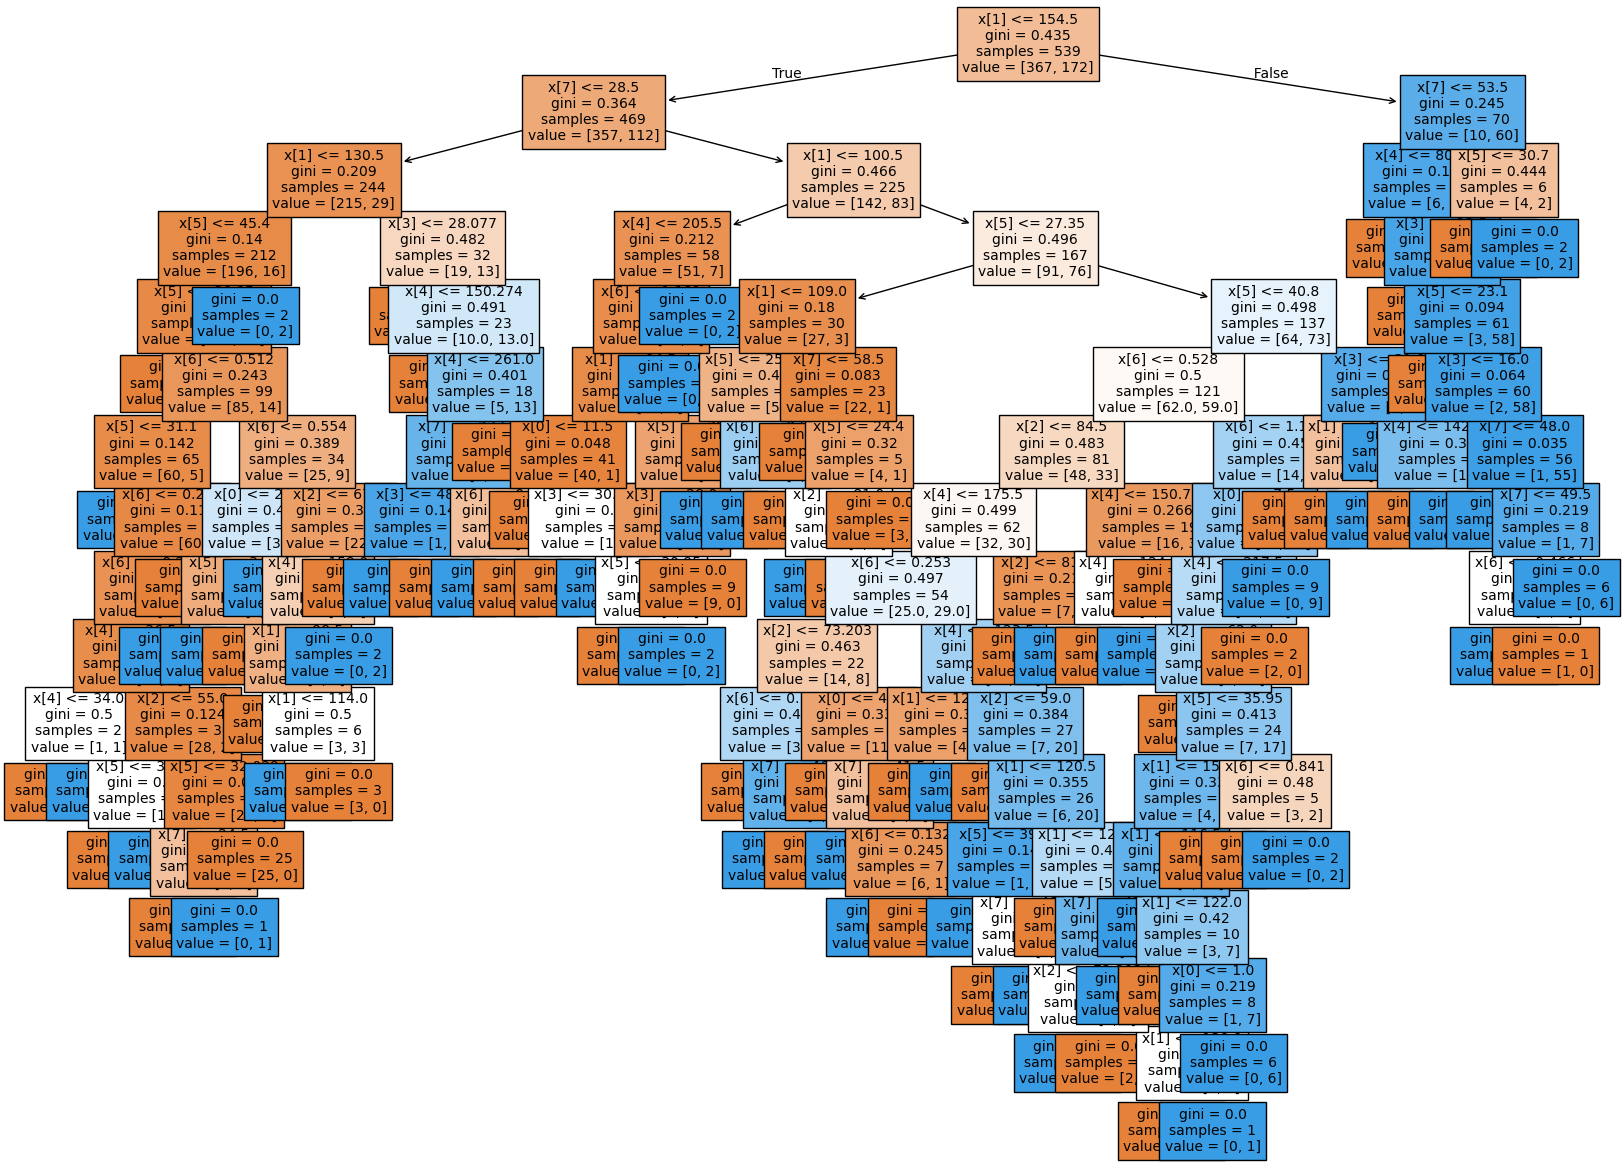

In [29]:
plt.figure(figsize = (20,15))
tree.plot_tree(dtc, filled = True, fontsize = 10)
plt.show()

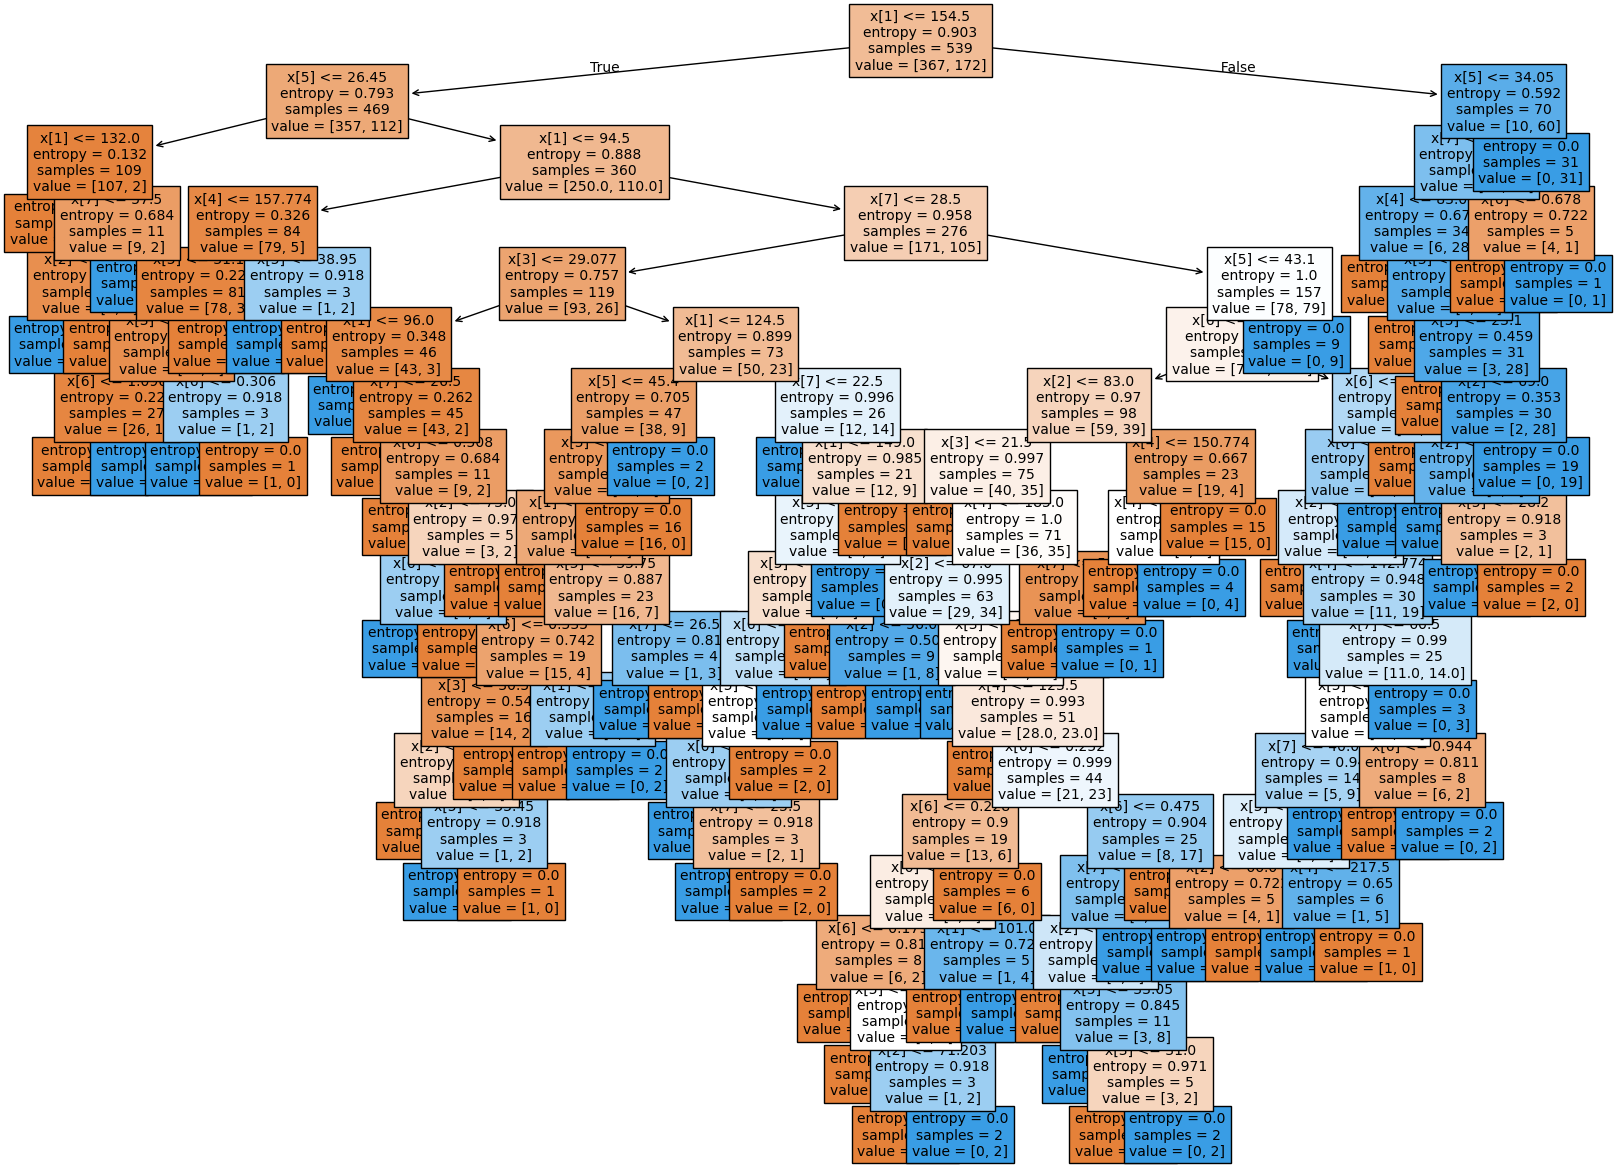

In [30]:
plt.figure(figsize = (20,15))
tree.plot_tree(dtc1, filled = True, fontsize = 10)
plt.show()

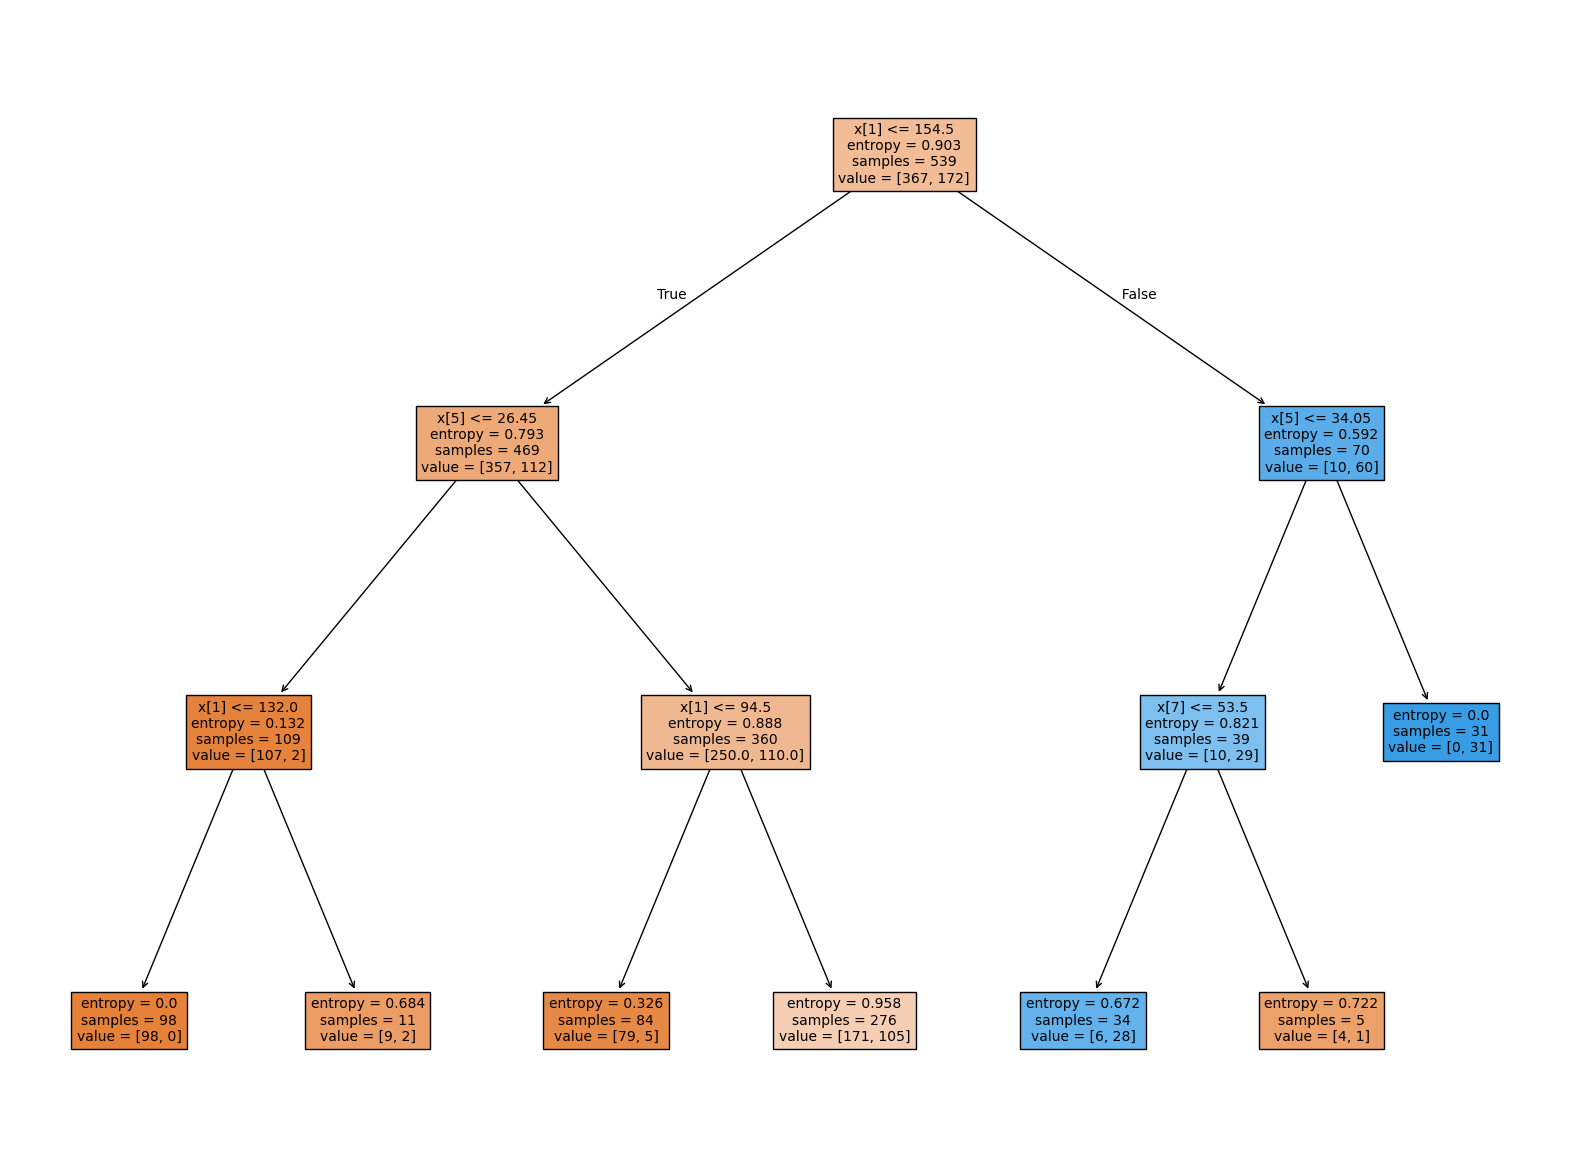

In [31]:
plt.figure(figsize = (20,15))  # here balanced overfitting condition.
tree.plot_tree(dtc2, filled = True, fontsize = 10)
plt.show()

In [32]:
# it is completed -------------------------------------

In [33]:
####################################################333

In [34]:
# work on next dataset -----

In [35]:
df = pd.read_csv('mushrooms.csv')
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [36]:
df.shape

(8124, 23)

In [37]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [39]:
df.describe(include = 'all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [40]:
# In this dataset, manager tell us what is the meaning of a,b,c-------

In [41]:
# all columns are categoric. in this dataset we dont need to do more. 

In [42]:
# target column is "class"

In [43]:
df['class'].unique() # p is poisonous mushroom and e is ediable mushroom species.

array(['p', 'e'], dtype=object)

In [44]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

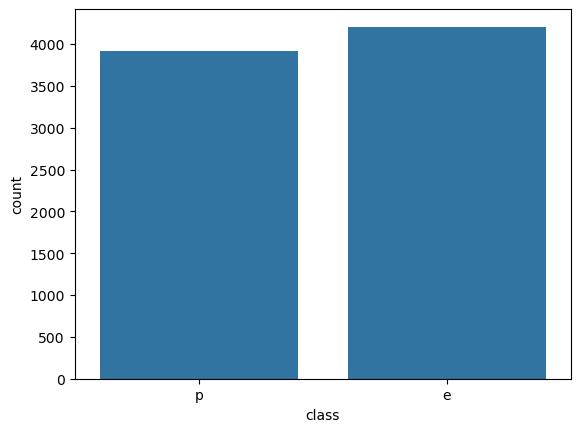

In [45]:
# countplot
sns.countplot(x = 'class', data = df)

In [46]:
# Ml steps

In [47]:
# encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


In [48]:
# feature selection
df['veil-type'].unique()

array([0])

In [49]:
df = df.drop(['veil-type'], axis = 1)

In [50]:
# split
X = df.drop('class', axis = 1)
y = df['class']

In [51]:
# use Logistic regression than DT.

In [52]:
# our target cloumn is class so in class only two variable or values so we can use here LogisticRegression & DT

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
# model_selection
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# print('Training feature matrix size :', X_train.shape)
# print('Training target vector size :', y_train.shape)
# print('Testing feature matrix size :', X_test.shape)
# print('Testing target vector size :', y_test.shape)

In [55]:
# find the best random_state

maxAccu = 0
maxRS = 0

for i in range(1,250):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print('Best accuracy is', maxAccu, 'on Random_state', maxRS)

Best accuracy is 0.9597165236851921 on Random_state 167


In [56]:
# whatever random_state comes then we will use it in model_selection step.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=167)

In [57]:
# use algo
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [58]:
# pred
y_pred = log_reg.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))
print()
print('Accuracy score', accuracy_score(y_test, y_pred))
print()
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1424
           1       0.96      0.95      0.96      1257

    accuracy                           0.96      2681
   macro avg       0.96      0.96      0.96      2681
weighted avg       0.96      0.96      0.96      2681


Accuracy score 0.9597165236851921

[[1376   48]
 [  60 1197]]


In [60]:
# Now DT
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_dtc_pred = dtc.predict(X_test)

In [61]:
print(classification_report(y_test,y_dtc_pred))
print()
print(confusion_matrix(y_test, y_dtc_pred))
print('Accuracy Score', accuracy_score(y_test,y_dtc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1424
           1       1.00      1.00      1.00      1257

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681


[[1424    0]
 [   0 1257]]
Accuracy Score 1.0


In [62]:
dtc.score(X_train, y_train)

1.0

In [63]:
dtc.score(X_test, y_test)

1.0

In [65]:
# if in dtc.score(X_train,y_train) and dtc.core(X_test, y_test) there is no diff. then we will forward this to the team.

In [66]:
#Complete this ------------------------------------------------------------------

In [67]:
#########################################################################

In [68]:
# Now working on next dataset.

In [69]:
# RandomForest Alogrithm.